### An example showing the plot_confusion_matrix method used by a scikit-learn classifier

In this example, we'll be plotting a `confusion matrix` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_confusion_matrix` method.

In [1]:
from sklearn.datasets import load_digits as data_10_classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, train_test_split

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.5.0.dev0+git.20250430.079ba10'

In [2]:
sp.metrics.plot_confusion_matrix?

Signature:
sp.metrics.plot_confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    true_labels=None,
    pred_labels=None,
    normalize=False,
    hide_zeros=False,
    hide_counts=False,
    title=None,
    title_fontsize='large',
    text_fontsize='medium',
    x_tick_rotation=0,
    cmap='Blues',
    show_colorbar=True,
    **kwargs,
)
Docstring:
Generates a confusion matrix plot from predictions and true labels.

The confusion matrix is a summary of prediction results that shows the counts of true
and false positives and negatives for each class. This function also provides options for
normalizing, hiding zero values, and customizing the plot appearance.

Parameters
----------
y_true : array-like, shape (n_samples,)
    Ground truth (correct) target values.

y_pred : array-like, shape (n_samples,)
    Estimated targets as returned by a classifier.

labels : array-like, shape (n_classes), optional
    List of labels to index the matrix. This may be used to reorder or 

In [3]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=0
)

### LogisticRegression

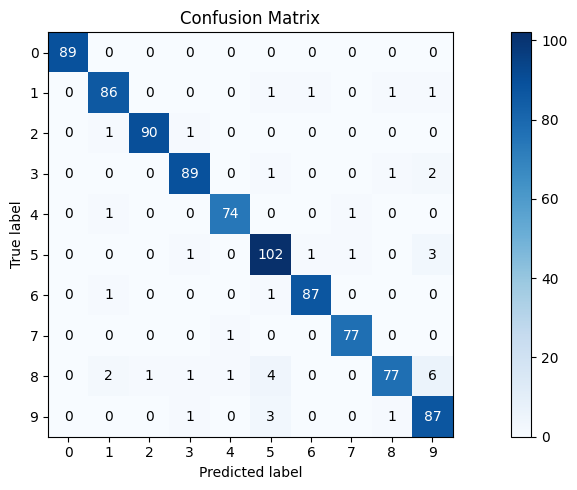

In [4]:
# Create an instance of the LogisticRegression
model = (
    LogisticRegression(max_iter=int(1e5), random_state=0)
    .fit(X_train, y_train)
)

# Perform predictions
y_val_pred = model.predict(X_val)

# Plot!
ax = sp.metrics.plot_confusion_matrix(
    y_val, y_val_pred,
    normalize=False,
)

### RandomForestClassifier

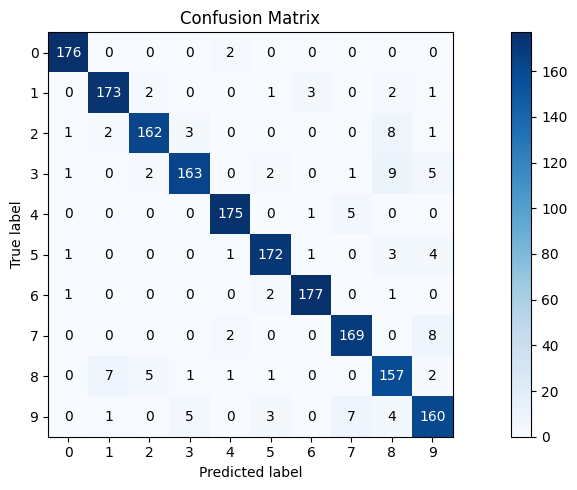

In [5]:
# Create an instance of the RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

# Perform predictions
predictions = cross_val_predict(classifier, X, y, method='predict')

# Plot!
plot = sp.metrics.plot_confusion_matrix(
    y, predictions, normalize=False
)